<a href="https://colab.research.google.com/github/AkashChauhanSoftEngi/Data-Science-Concepts-using-python/blob/main/5.%20cnn_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [ ]:
# Install tensorflow_hub using pip install tensorflow_hub first

# Useful Links:
  # https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
  # https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub
  # https://keras.io/api/applications/

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Make predictions using ready made model (without any training)**

In [ ]:
# https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

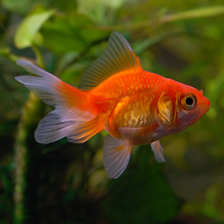

In [ ]:
path = "/content/drive/MyDrive/Research_Work/Data_Science_Projects/IIT_Data_Science_Course"
gold_fish = Image.open(os.path.join(path,"goldfish.jpeg")).resize(IMAGE_SHAPE)
gold_fish


In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
# numpy.newaxis is used to increase the dimension of the existing array by one more dimension, when used once. 
# gold_fish = gold_fish[np.newaxis, ...]
# gold_fish


gold_fish[np.newaxis, ...].shape # will not change size of image 

(1, 224, 224, 3)

In [ ]:
gold_fish.shape

(224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open(os.path.join(path,"ImageNetLabels.txt"), "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

<h3 style='color:purple'>Load flowers dataset</h3>

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/roses/1831404161_d2df86fd70.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg'),
 PosixPath('datasets/flower_photos/roses/18990187093_09f2bff8fc_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/roses/1831404161_d2df86fd70.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg'),
 PosixPath('datasets/flower_photos/roses/18990187093_09f2bff8fc_m.jpg')]

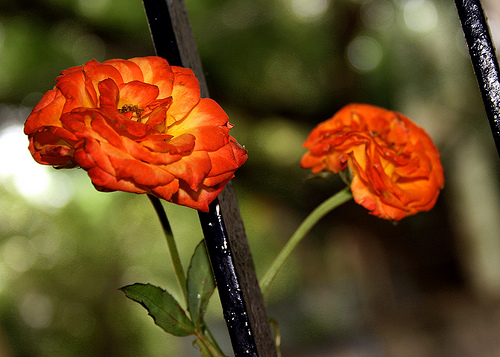

In [ ]:
Image.open(str(roses[1]))

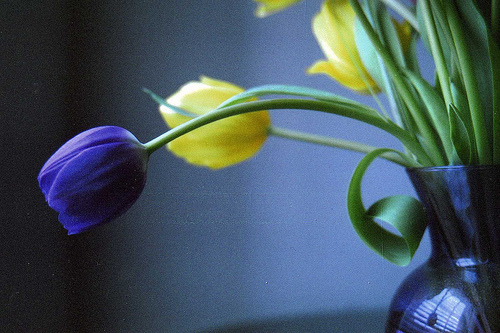

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/roses/1831404161_d2df86fd70.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg'),
 PosixPath('datasets/flower_photos/roses/18990187093_09f2bff8fc_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Make prediction using pre-trained model on new flowers dataset**

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

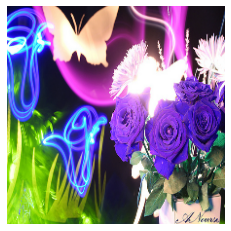

In [ ]:
plt.axis('off')
plt.imshow(X[0])

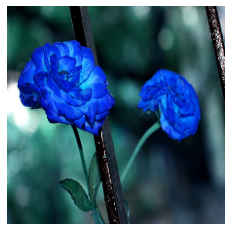

In [ ]:
plt.axis('off')
plt.imshow(X[1])

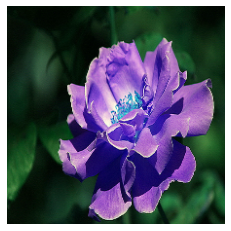

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 722, 795])

In [ ]:
image_labels[795]

'shower curtain'

<h3 style='color:purple'>Now take pre-trained model and retrain it using flowers images</h3>

In [ ]:
# This model is same as previous one, except the last layer
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 65s 719ms/step - loss: 0.7956 - acc: 0.6959
Epoch 2/5
86/86 [==============================] - 62s 723ms/step - loss: 0.4099 - acc: 0.8554
Epoch 3/5
86/86 [==============================] - 62s 722ms/step - loss: 0.3239 - acc: 0.8928
Epoch 4/5
86/86 [==============================] - 63s 728ms/step - loss: 0.2672 - acc: 0.9128
Epoch 5/5
86/86 [==============================] - 62s 725ms/step - loss: 0.2284 - acc: 0.9273


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 21s 715ms/step - loss: 0.4034 - acc: 0.8693


[0.4033954441547394, 0.8692810535430908]